In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, GRU, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [4]:
# Load the data
data = data = pd.read_csv('I:/WAF with mechine learning/Dataset/SQL and XSS/csic_database.csv')

In [6]:
data.columns=[ 'class','Method','User-Agent','Pragma','Cache-Control','Accept','Accept-encoding','Accept-charset','language','host','cookie','content-type', 'connection', 'lenght', 'content', 'classification', 'URL']

In [7]:
data = data.rename(columns={'Unnamed: 0': 'Class'})
data = data.rename(columns={'lenght': 'content_length'})
data.head()

,class,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,content_length,content,classification,URL
0,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,Connection: close,Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...
3,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/autentic...
4,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,application/x-www-form-urlencoded,Connection: close,Content-Length: 63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...





Epoch 1/20


55/55 [==============================] - 13s 162ms/step - loss: 0.4619 - accuracy: 0.7556 - val_loss: 0.5184 - val_accuracy: 0.8276
Epoch 2/20
55/55 [==============================] - 8s 139ms/step - loss: 0.0601 - accuracy: 0.9798 - val_loss: 0.3760 - val_accuracy: 0.8783
Epoch 3/20
55/55 [==============================] - 7s 136ms/step - loss: 0.0104 - accuracy: 0.9978 - val_loss: 0.1795 - val_accuracy: 0.9761
Epoch 4/20
55/55 [==============================] - 8s 143ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0991 - val_accuracy: 0.9750
Epoch 5/20
55/55 [==============================] - 9s 170ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0792 - val_accuracy: 0.9755
Epoch 6/20
55/55 [==============================] - 8s 144ms/step - loss: 8.5121e-04 - accuracy: 0.9999 - val_loss: 0.0914 - val_accuracy: 0.9710
Epoch 7/20
55/55 [==============================] - 8s 138ms/step - loss: 5.4694e-04 - accuracy: 0.9999 - val_loss: 0.0682 - val_accuracy:

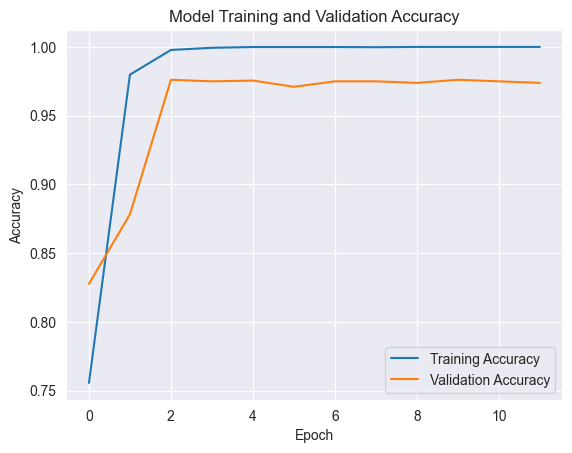

Loss test Accuracy 0.058677203953266144


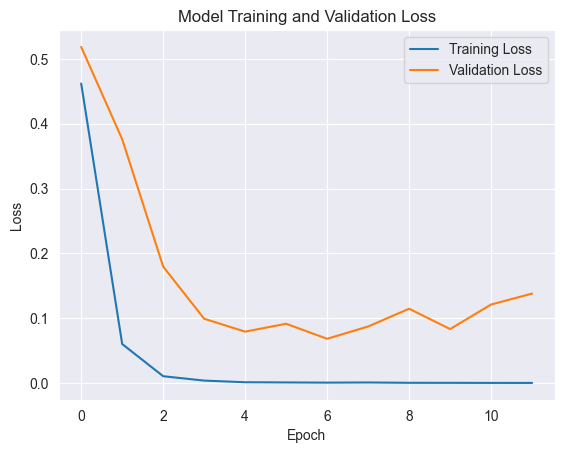

55/55 [==============================] - 1s 9ms/step


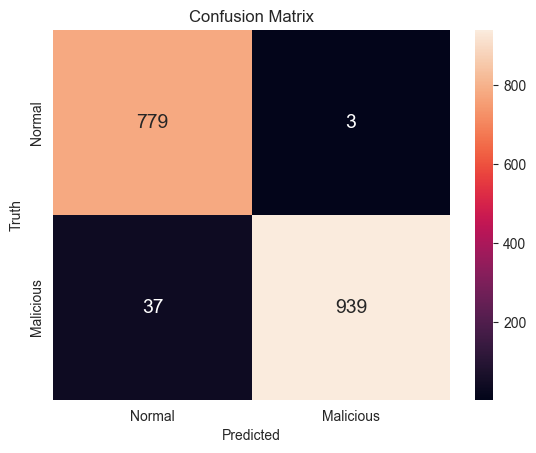

Precision: 0.9968152866242038
Recall: 0.9620901639344263
F1-score: 0.9791449426485923
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       782
           1       1.00      0.96      0.98       976

    accuracy                           0.98      1758
   macro avg       0.98      0.98      0.98      1758
weighted avg       0.98      0.98      0.98      1758



In [8]:
#train test split in 80:20 ratio
np.random.seed(42)
tf.random.set_seed(42)

# Data preprocessing
required_columns = ['Method','host','cookie','Accept', 'content_length', 'content','classification','URL']
data.dropna(subset=required_columns, inplace=True)

data['combined_text'] = data['Method'] + ' ' + data['host'] + ' ' + data['cookie'] + ' ' + data['Accept'] + ' ' + data['content_length'] + ' ' + data['content'] + ' ' + data['URL']
data['combined_text'] = data['combined_text'].astype(str)

features = data['combined_text'].values
labels = data['classification'].values

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_seq_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_seq_length, padding='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_seq_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_seq_length, padding='post')

# Define the GRU model
inputs = Input(shape=(max_seq_length,))
embedding = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100)(inputs)
conv1d = Conv1D(128, 5, padding='same', activation='relu')(embedding)
max_pooling = MaxPooling1D(pool_size=5)(conv1d)
dropout = Dropout(0.5)(max_pooling)
gru = GRU(128, dropout=0.5, return_sequences=True)(dropout)  # Add return_sequences=True
dense = Dense(64, activation='relu')(gru)
batch_norm = BatchNormalization()(dense)
global_avg_pooling = GlobalAveragePooling1D()(batch_norm)
output = Dense(1, activation='sigmoid')(global_avg_pooling)  # Adjust the output layer according to your problem

# Define the model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_padded, y_train, epochs=20, batch_size=256,
                    validation_data=(X_val_padded, y_val), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print("Test Accuracy:", test_accuracy)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Training and Validation Accuracy')
plt.legend()
plt.show()

#Loss accuracy
print("Loss test Accuracy", test_loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training and Validation Loss')
plt.legend()
plt.show()

#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = (y_pred > 0.5)
y_pred = y_pred.astype(int)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',  xticklabels=['Normal', 'Malicious'], yticklabels=['Normal', 'Malicious'],
            annot_kws={'fontsize': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Epoch 1/20
45/45 [==============================] - 10s 146ms/step - loss: 0.4931 - accuracy: 0.7299 - val_loss: 0.5417 - val_accuracy: 0.6011
Epoch 2/20
45/45 [==============================] - 6s 130ms/step - loss: 0.0809 - accuracy: 0.9707 - val_loss: 0.3921 - val_accuracy: 0.9675
Epoch 3/20
45/45 [==============================] - 6s 129ms/step - loss: 0.0144 - accuracy: 0.9958 - val_loss: 0.2708 - val_accuracy: 0.9259
Epoch 4/20
45/45 [==============================] - 6s 129ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.1486 - val_accuracy: 0.9652
Epoch 5/20
45/45 [==============================] - 6s 129ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.1123 - val_accuracy: 0.9655
Epoch 6/20
45/45 [==============================] - 6s 129ms/step - loss: 7.2395e-04 - accuracy: 1.0000 - val_loss: 0.0942 - val_accuracy: 0.9681
Epoch 7/20
45/45 [==============================] - 6s 130ms/step - loss: 4.2518e-04 - accuracy: 1.0000 - val_loss: 0.0873 - val_accuracy: 0.97

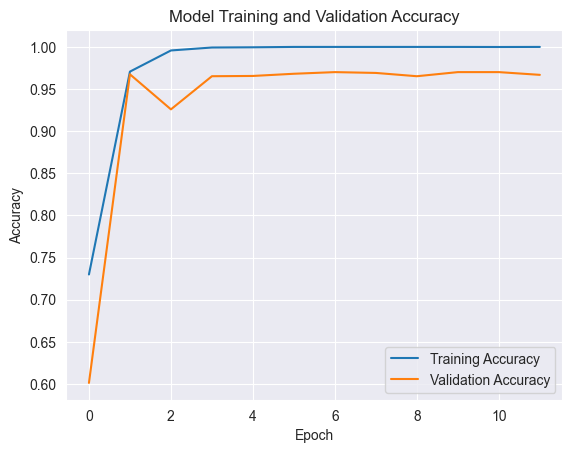

Loss test Accuracy 0.09890545904636383


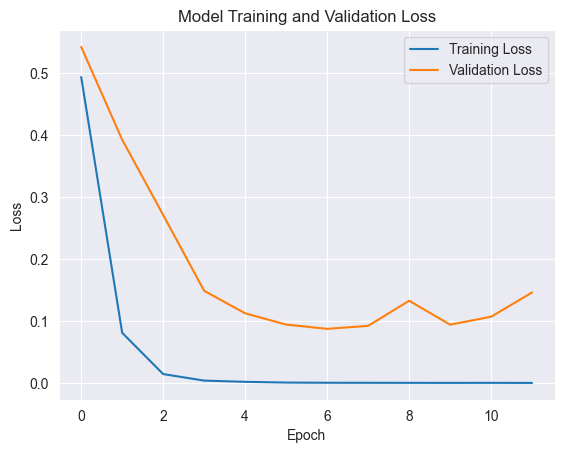

97/97 [==============================] - 1s 6ms/step


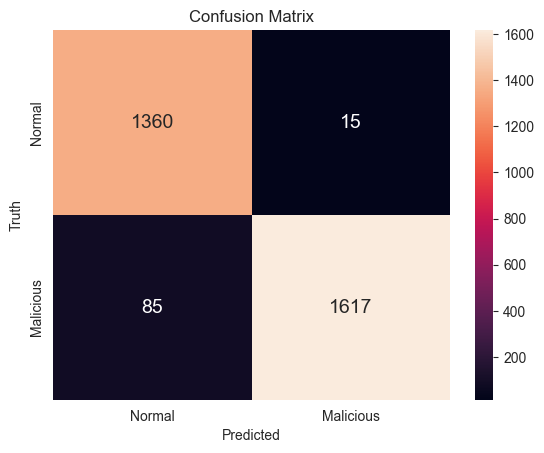

Precision: 0.9908088235294118
Recall: 0.9500587544065805
F1-score: 0.97000599880024
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1375
           1       0.99      0.95      0.97      1702

    accuracy                           0.97      3077
   macro avg       0.97      0.97      0.97      3077
weighted avg       0.97      0.97      0.97      3077



In [9]:
#train test split in 65:35 ratio
np.random.seed(42)
tf.random.set_seed(42)

# Data preprocessing
required_columns = ['Method','host','cookie','Accept', 'content_length', 'content','classification','URL']
data.dropna(subset=required_columns, inplace=True)

data['combined_text'] = data['Method'] + ' ' + data['host'] + ' ' + data['cookie'] + ' ' + data['Accept'] + ' ' + data['content_length'] + ' ' + data['content'] + ' ' + data['URL']
data['combined_text'] = data['combined_text'].astype(str)

features = data['combined_text'].values
labels = data['classification'].values

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_seq_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_seq_length, padding='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_seq_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_seq_length, padding='post')

# Define the GRU model
inputs = Input(shape=(max_seq_length,))
embedding = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100)(inputs)
conv1d = Conv1D(128, 5, padding='same', activation='relu')(embedding)
max_pooling = MaxPooling1D(pool_size=5)(conv1d)
dropout = Dropout(0.5)(max_pooling)
gru = GRU(128, dropout=0.5, return_sequences=True)(dropout)  # Add return_sequences=True
dense = Dense(64, activation='relu')(gru)
batch_norm = BatchNormalization()(dense)
global_avg_pooling = GlobalAveragePooling1D()(batch_norm)
output = Dense(1, activation='sigmoid')(global_avg_pooling)  # Adjust the output layer according to your problem

# Define the model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_padded, y_train, epochs=20, batch_size=256,
                    validation_data=(X_val_padded, y_val), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print("Test Accuracy:", test_accuracy)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Training and Validation Accuracy')
plt.legend()
plt.show()

#Loss accuracy
print("Loss test Accuracy", test_loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training and Validation Loss')
plt.legend()
plt.show()

#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = (y_pred > 0.5)
y_pred = y_pred.astype(int)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',  xticklabels=['Normal', 'Malicious'], yticklabels=['Normal', 'Malicious'],
            annot_kws={'fontsize': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Epoch 1/20
42/42 [==============================] - 9s 152ms/step - loss: 0.5305 - accuracy: 0.7078 - val_loss: 0.6067 - val_accuracy: 0.5489
Epoch 2/20
42/42 [==============================] - 6s 139ms/step - loss: 0.0980 - accuracy: 0.9631 - val_loss: 0.3872 - val_accuracy: 0.9465
Epoch 3/20
42/42 [==============================] - 6s 134ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.2490 - val_accuracy: 0.9659
Epoch 4/20
42/42 [==============================] - 6s 137ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.1932 - val_accuracy: 0.9642
Epoch 5/20
42/42 [==============================] - 6s 136ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.1491 - val_accuracy: 0.9676
Epoch 6/20
42/42 [==============================] - 6s 143ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.1185 - val_accuracy: 0.9610
Epoch 7/20
42/42 [==============================] - 5s 130ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.1223 - val_accuracy: 0.9571
Epoch 

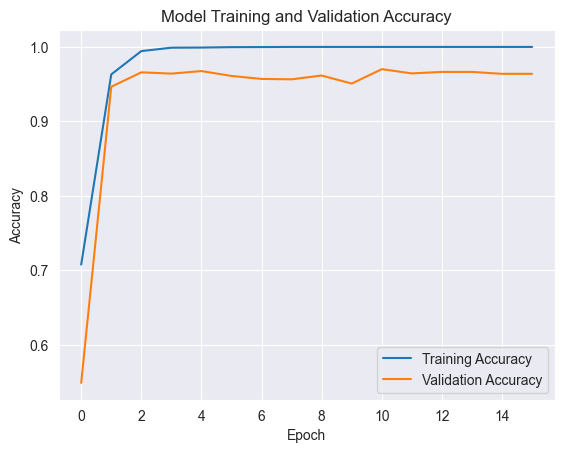

Loss test Accuracy 0.1131669133901596


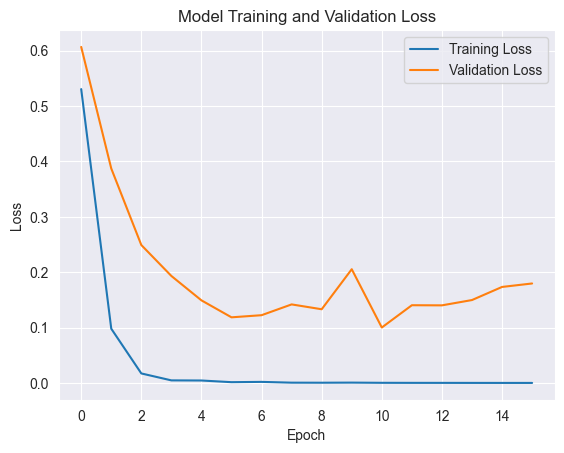

110/110 [==============================] - 1s 6ms/step


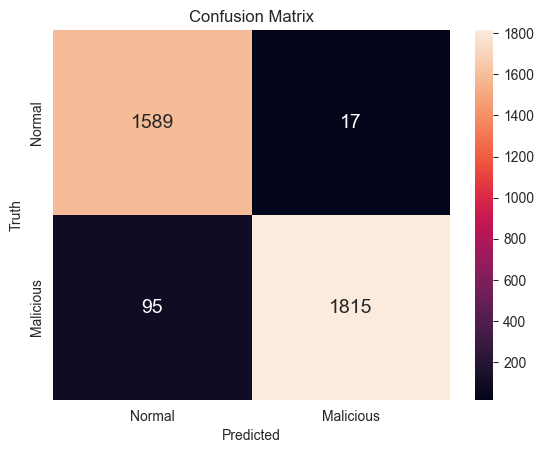

Precision: 0.9907205240174672
Recall: 0.9502617801047121
F1-score: 0.9700694815606627
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1606
           1       0.99      0.95      0.97      1910

    accuracy                           0.97      3516
   macro avg       0.97      0.97      0.97      3516
weighted avg       0.97      0.97      0.97      3516



In [10]:
#train test split in 60:40 ratio
np.random.seed(42)
tf.random.set_seed(42)

# Data preprocessing
required_columns = ['Method','host','cookie','Accept', 'content_length', 'content','classification','URL']
data.dropna(subset=required_columns, inplace=True)

data['combined_text'] = data['Method'] + ' ' + data['host'] + ' ' + data['cookie'] + ' ' + data['Accept'] + ' ' + data['content_length'] + ' ' + data['content'] + ' ' + data['URL']
data['combined_text'] = data['combined_text'].astype(str)

features = data['combined_text'].values
labels = data['classification'].values

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_seq_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_seq_length, padding='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_seq_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_seq_length, padding='post')

# Define the GRU model
inputs = Input(shape=(max_seq_length,))
embedding = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100)(inputs)
conv1d = Conv1D(128, 5, padding='same', activation='relu')(embedding)
max_pooling = MaxPooling1D(pool_size=5)(conv1d)
dropout = Dropout(0.5)(max_pooling)
gru = GRU(128, dropout=0.5, return_sequences=True)(dropout)  # Add return_sequences=True
dense = Dense(64, activation='relu')(gru)
batch_norm = BatchNormalization()(dense)
global_avg_pooling = GlobalAveragePooling1D()(batch_norm)
output = Dense(1, activation='sigmoid')(global_avg_pooling)  # Adjust the output layer according to your problem

# Define the model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_padded, y_train, epochs=20, batch_size=256,
                    validation_data=(X_val_padded, y_val), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print("Test Accuracy:", test_accuracy)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Training and Validation Accuracy')
plt.legend()
plt.show()

#Loss accuracy
print("Loss test Accuracy", test_loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training and Validation Loss')
plt.legend()
plt.show()

#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = (y_pred > 0.5)
y_pred = y_pred.astype(int)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',  xticklabels=['Normal', 'Malicious'], yticklabels=['Normal', 'Malicious'],
            annot_kws={'fontsize': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Epoch 1/20
49/49 [==============================] - 10s 145ms/step - loss: 0.4666 - accuracy: 0.7488 - val_loss: 0.5307 - val_accuracy: 0.9431
Epoch 2/20
49/49 [==============================] - 6s 130ms/step - loss: 0.0603 - accuracy: 0.9790 - val_loss: 0.3012 - val_accuracy: 0.9712
Epoch 3/20
49/49 [==============================] - 7s 143ms/step - loss: 0.0132 - accuracy: 0.9967 - val_loss: 0.1948 - val_accuracy: 0.9727
Epoch 4/20
49/49 [==============================] - 7s 151ms/step - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.2380 - val_accuracy: 0.9242
Epoch 5/20
49/49 [==============================] - 7s 136ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0947 - val_accuracy: 0.9761
Epoch 6/20
49/49 [==============================] - 7s 142ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0779 - val_accuracy: 0.9746
Epoch 7/20
49/49 [==============================] - 7s 148ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.1007 - val_accuracy: 0.9678
Epoch

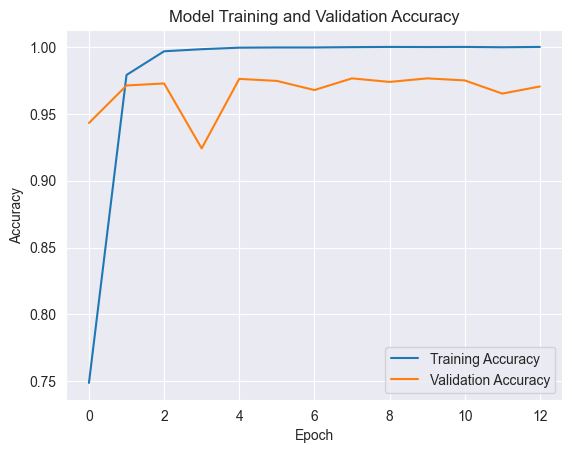

Loss test Accuracy 0.0752069354057312


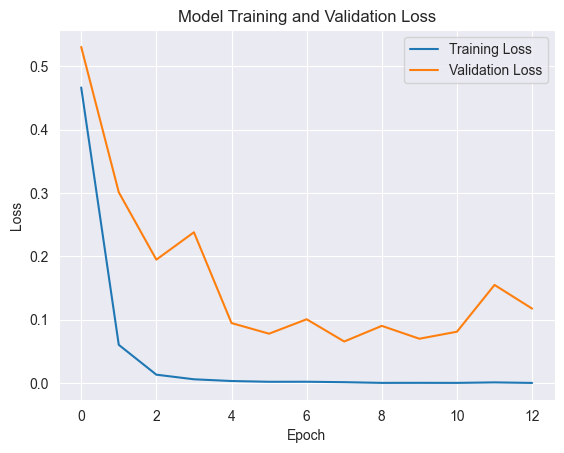

83/83 [==============================] - 1s 6ms/step


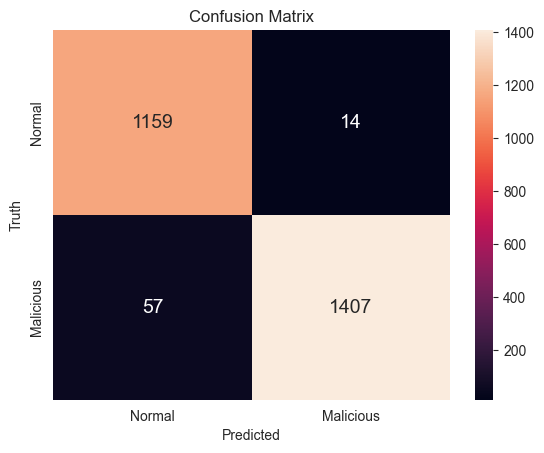

Precision: 0.9901477832512315
Recall: 0.9610655737704918
F1-score: 0.9753899480069325
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1173
           1       0.99      0.96      0.98      1464

    accuracy                           0.97      2637
   macro avg       0.97      0.97      0.97      2637
weighted avg       0.97      0.97      0.97      2637



In [11]:
#train test split in 70:30 ratio
np.random.seed(42)
tf.random.set_seed(42)

# Data preprocessing
required_columns = ['Method','host','cookie','Accept', 'content_length', 'content','classification','URL']
data.dropna(subset=required_columns, inplace=True)

data['combined_text'] = data['Method'] + ' ' + data['host'] + ' ' + data['cookie'] + ' ' + data['Accept'] + ' ' + data['content_length'] + ' ' + data['content'] + ' ' + data['URL']
data['combined_text'] = data['combined_text'].astype(str)

features = data['combined_text'].values
labels = data['classification'].values

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_seq_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_seq_length, padding='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_seq_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_seq_length, padding='post')

# Define the GRU model
inputs = Input(shape=(max_seq_length,))
embedding = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100)(inputs)
conv1d = Conv1D(128, 5, padding='same', activation='relu')(embedding)
max_pooling = MaxPooling1D(pool_size=5)(conv1d)
dropout = Dropout(0.5)(max_pooling)
gru = GRU(128, dropout=0.5, return_sequences=True)(dropout)  # Add return_sequences=True
dense = Dense(64, activation='relu')(gru)
batch_norm = BatchNormalization()(dense)
global_avg_pooling = GlobalAveragePooling1D()(batch_norm)
output = Dense(1, activation='sigmoid')(global_avg_pooling)  # Adjust the output layer according to your problem

# Define the model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_padded, y_train, epochs=20, batch_size=256,
                    validation_data=(X_val_padded, y_val), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print("Test Accuracy:", test_accuracy)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Training and Validation Accuracy')
plt.legend()
plt.show()

#Loss accuracy
print("Loss test Accuracy", test_loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training and Validation Loss')
plt.legend()
plt.show()

#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = (y_pred > 0.5)
y_pred = y_pred.astype(int)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',  xticklabels=['Normal', 'Malicious'], yticklabels=['Normal', 'Malicious'],
            annot_kws={'fontsize': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Epoch 1/20
52/52 [==============================] - 11s 142ms/step - loss: 0.4528 - accuracy: 0.7568 - val_loss: 0.5274 - val_accuracy: 0.7993
Epoch 2/20
52/52 [==============================] - 7s 138ms/step - loss: 0.0557 - accuracy: 0.9808 - val_loss: 0.3596 - val_accuracy: 0.9003
Epoch 3/20
52/52 [==============================] - 7s 134ms/step - loss: 0.0097 - accuracy: 0.9976 - val_loss: 0.1809 - val_accuracy: 0.9763
Epoch 4/20
52/52 [==============================] - 7s 130ms/step - loss: 0.0031 - accuracy: 0.9995 - val_loss: 0.1139 - val_accuracy: 0.9718
Epoch 5/20
52/52 [==============================] - 7s 137ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0909 - val_accuracy: 0.9759
Epoch 6/20
52/52 [==============================] - 7s 129ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1328 - val_accuracy: 0.9326
Epoch 7/20
52/52 [==============================] - 7s 137ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0644 - val_accuracy: 0.9786
Epoch

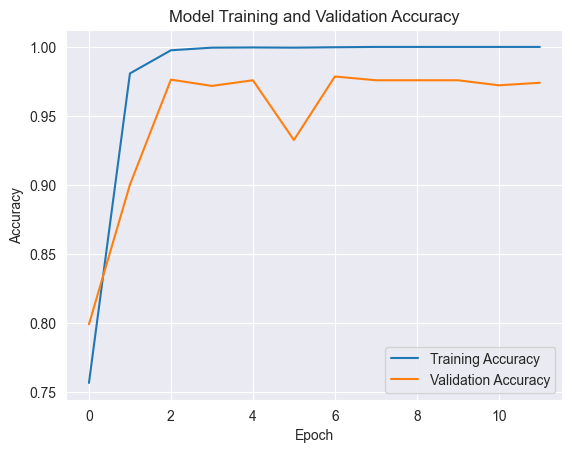

Loss test Accuracy 0.07006839662790298


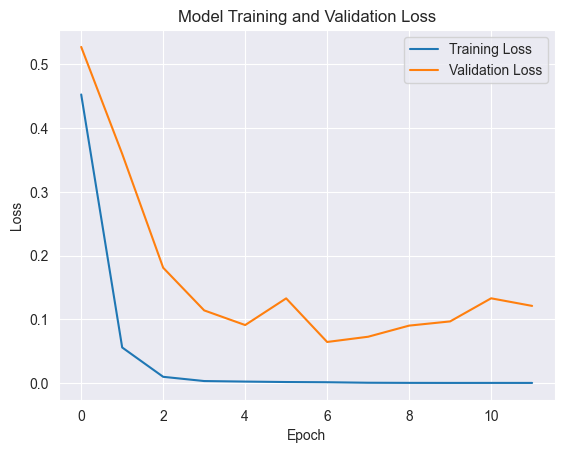

69/69 [==============================] - 1s 6ms/step


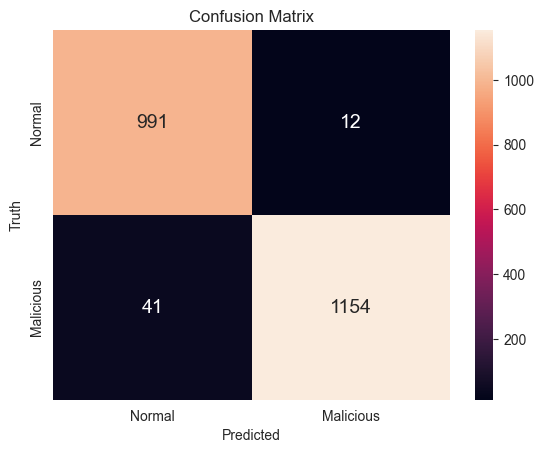

Precision: 0.9897084048027445
Recall: 0.9656903765690377
F1-score: 0.9775518847945786
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1003
           1       0.99      0.97      0.98      1195

    accuracy                           0.98      2198
   macro avg       0.97      0.98      0.98      2198
weighted avg       0.98      0.98      0.98      2198



In [12]:
#train test split in 75:25 ratio
np.random.seed(42)
tf.random.set_seed(42)

# Data preprocessing
required_columns = ['Method','host','cookie','Accept', 'content_length', 'content','classification','URL']
data.dropna(subset=required_columns, inplace=True)

data['combined_text'] = data['Method'] + ' ' + data['host'] + ' ' + data['cookie'] + ' ' + data['Accept'] + ' ' + data['content_length'] + ' ' + data['content'] + ' ' + data['URL']
data['combined_text'] = data['combined_text'].astype(str)

features = data['combined_text'].values
labels = data['classification'].values

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

X_train, X_temp, y_train, y_temp = train_test_split(features, labels, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_seq_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_seq_length, padding='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_seq_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_seq_length, padding='post')

# Define the GRU model
inputs = Input(shape=(max_seq_length,))
embedding = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100)(inputs)
conv1d = Conv1D(128, 5, padding='same', activation='relu')(embedding)
max_pooling = MaxPooling1D(pool_size=5)(conv1d)
dropout = Dropout(0.5)(max_pooling)
gru = GRU(128, dropout=0.5, return_sequences=True)(dropout)  # Add return_sequences=True
dense = Dense(64, activation='relu')(gru)
batch_norm = BatchNormalization()(dense)
global_avg_pooling = GlobalAveragePooling1D()(batch_norm)
output = Dense(1, activation='sigmoid')(global_avg_pooling)  # Adjust the output layer according to your problem

# Define the model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_padded, y_train, epochs=20, batch_size=256,
                    validation_data=(X_val_padded, y_val), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print("Test Accuracy:", test_accuracy)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Training and Validation Accuracy')
plt.legend()
plt.show()

#Loss accuracy
print("Loss test Accuracy", test_loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training and Validation Loss')
plt.legend()
plt.show()

#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = (y_pred > 0.5)
y_pred = y_pred.astype(int)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',  xticklabels=['Normal', 'Malicious'], yticklabels=['Normal', 'Malicious'],
            annot_kws={'fontsize': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))